In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/archive

/content/drive/MyDrive/archive


In [3]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
# Load the data
data = pd.read_csv('heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# check missing values
data.isna().sum() 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
data.nunique(axis=0)

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
data = data[ data.columns ].replace({'Yes' : 1, 'No' : 0, 'Male' : 1, 'Female' : 0, 'No, borderline diabetes': '0', 'Yes (during pregnancy)' : '1'})

data['Diabetic'] = data['Diabetic'].astype(int)

Data visualization

In [9]:
data.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [10]:
disease = len(data[ data['HeartDisease'] == 1 ])
no_disease = len(data[ data['HeartDisease'] == 0 ])

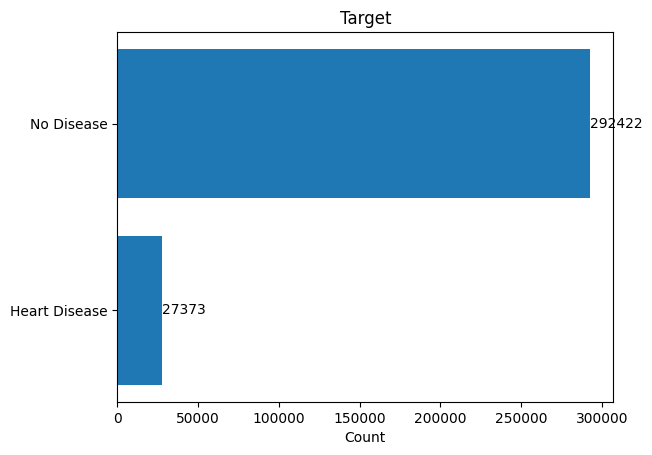

In [11]:
import matplotlib.pyplot as plt

plt.rcdefaults()

# Create just a figure and only one subplot
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')

y_pos = np.arange(len(y))

x = (disease, no_disease)

ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.set_xlabel('Count')
ax.set_title('Target')

for i, val in enumerate(x):
  ax.text(val + 10, i, str(val), color='black', va='center', fontweight='normal')
  
plt.show()


In [12]:
catcol = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
        'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

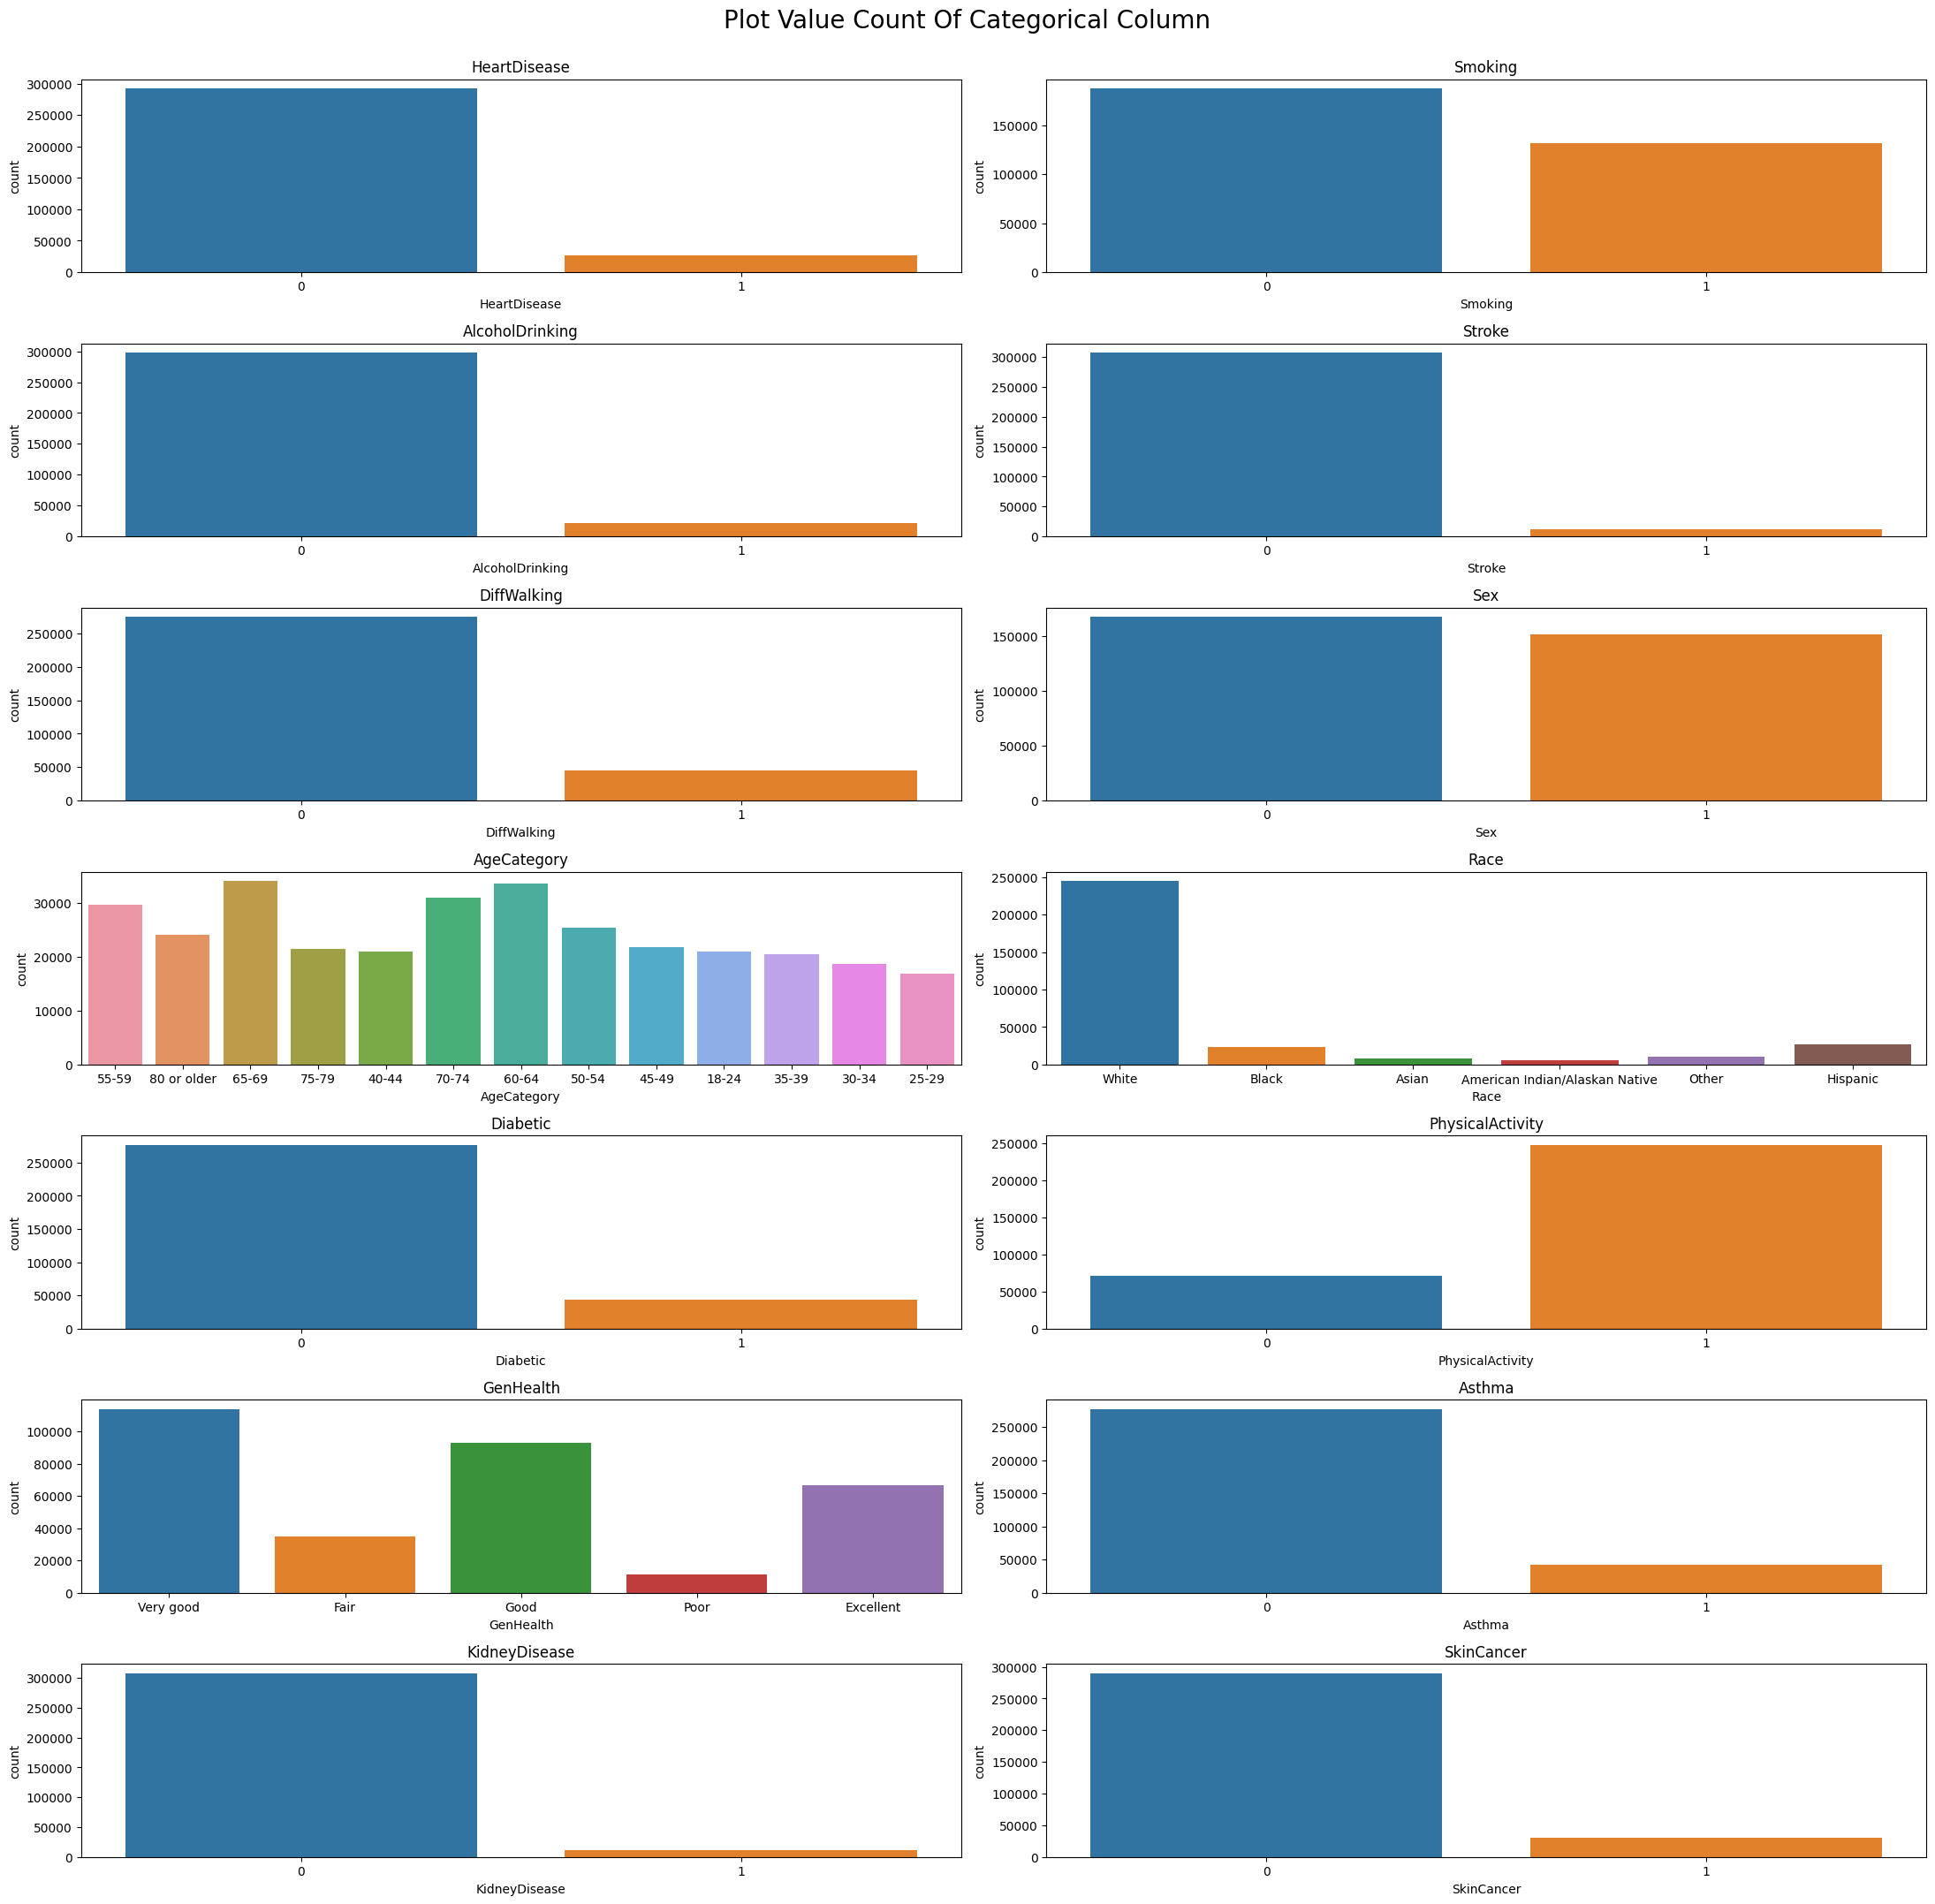

In [13]:
plt.figure(figsize=(22,42))

for i, column in enumerate(catcol):
  plt.subplot(len(catcol), 2, i+1)

  plt.suptitle("Plot Value Count Of Categorical Column", fontsize=20, x=0.5, y=1)
  seaborn.countplot(data=data, x=column)
  
  plt.title(f"{column}")
  plt.tight_layout()

In [14]:
numcol = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

<Axes: xlabel='SleepTime', ylabel='Count'>

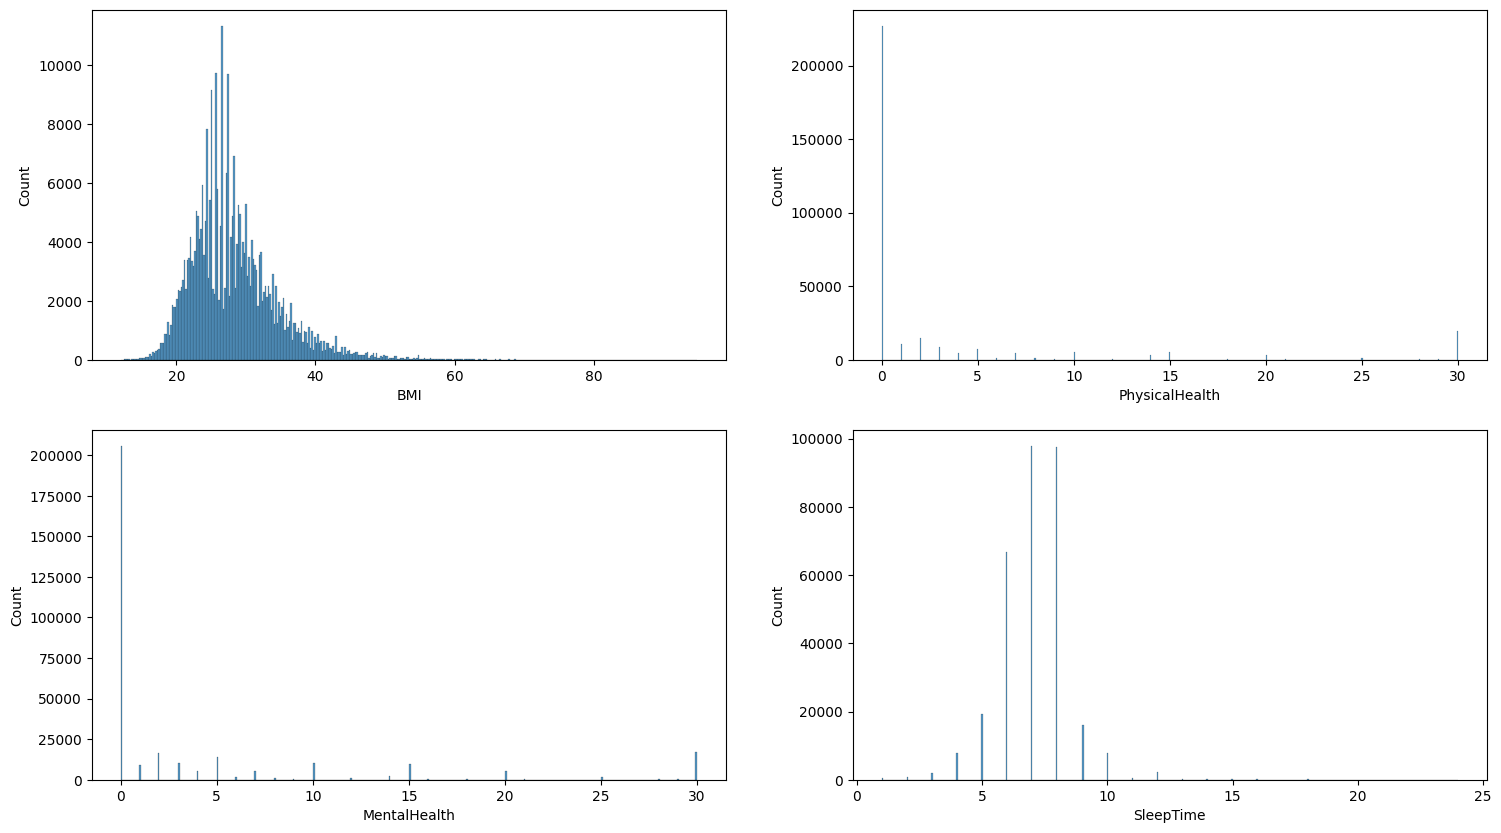

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
seaborn.histplot(ax=axes[0,0], data=data, x=numcol[0])
seaborn.histplot(ax=axes[0,1], data=data, x=numcol[1])
seaborn.histplot(ax=axes[1,0], data=data, x=numcol[2])
seaborn.histplot(ax=axes[1,1], data=data, x=numcol[3])

Data splitting

In [ ]:
# Since the dataset is undersampled with many data for adults without heart disease, we will oversample the data to make it more balanced

class_0 = data[data['HeartDisease'] == 0]
class_1 = data[data['HeartDisease'] == 1]

class_1 = class_1.sample( len(class_0), replace = True )
data = pd.concat([class_0, class_1], axis = 0)

print('Data in data:')
print(data['HeartDisease'].value_counts())

Data in data:
0    292422
1     27373
Name: HeartDisease, dtype: int64


In [ ]:
#16
from sklearn.model_selection import train_test_split


features = data.drop(columns= ['HeartDisease'], axis = 1 )
target = data['HeartDisease']

X_train, X_test , y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state = 0)


print('Shape of X and y respectively :', features.shape, target.shape)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

Shape of X and y respectively : (319795, 17) (319795,)
shape of X and y respectively (train) : (255836, 17) (255836,)
shape of X and y respectively (test) : (63959, 17) (63959,)


 Data Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


transformer = make_column_transformer( (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth'] ), remainder = 'passthrough')

# Encode training data
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

X_train = pd.concat( [transformed_train_data, X_train] , axis = 1)

# Remove old columns
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)


# Encode test data
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns= transformer.get_feature_names_out())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat( [transformed_test_data, X_test], axis = 1 )

# Remove old columns
X_test.drop( ['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True )

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Data Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale training data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter= 1000)
lr.fit(X_train, y_train)

Y_pred = lr.predict(X_test)


# Heart disease, yes or no ? 1 or 0
output = pd.DataFrame({ 'Predicted' : Y_pred })
print(output.head())

people = output.loc[output.Predicted == 1]['Predicted']
rate_people = 0

if len(people) > 0:
  rate_people = len(people) / len(output)

print('Percentage of people predicted with heart disease', rate_people)


from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


   Predicted
0          0
1          0
2          0
3          0
4          0
Percentage of people predicted with heart disease 0.01618224174862021
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58512
           1       0.53      0.10      0.17      5447

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.92      0.89     63959



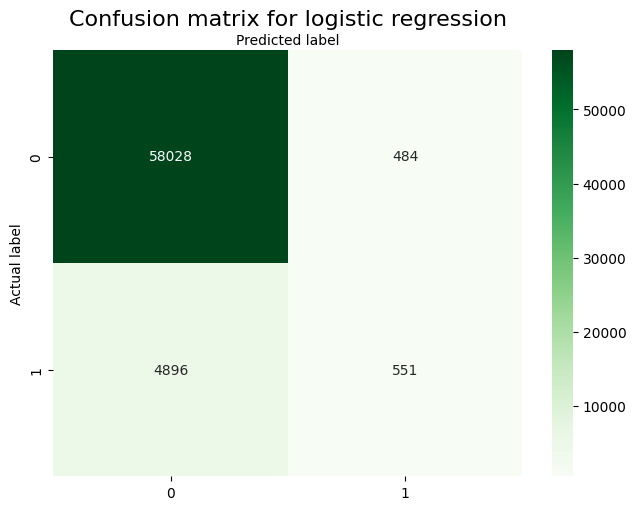

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, Y_pred)
class_names = [0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

seaborn.heatmap(pd.DataFrame(confusion_matrix) , annot=True, cmap = 'Greens', fmt= 'g')

ax.xaxis.set_label_position('top')
plt.tight_layout()

plt.title('Confusion matrix for logistic regression', size = 16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

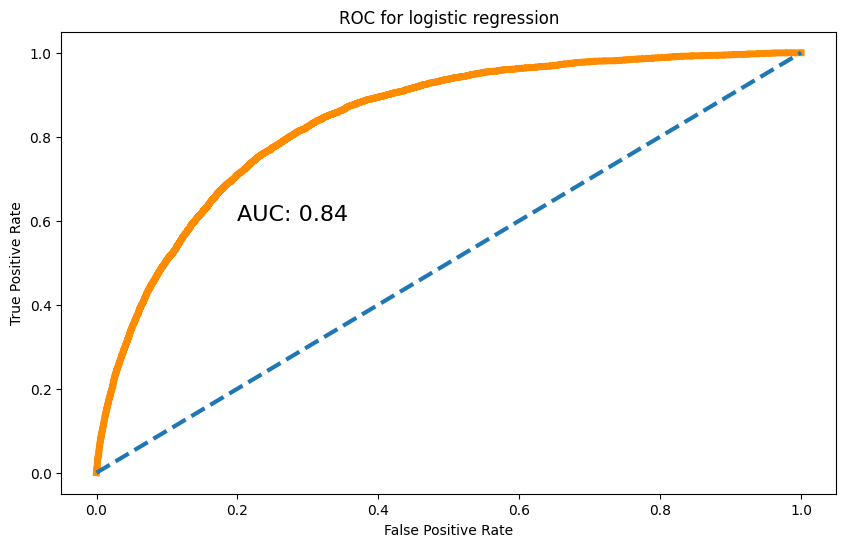

In [ ]:
#  đánh giá của chỉ số AUC dùng biểu đồ ROC (receiver operating characteristic)
from sklearn.metrics import roc_auc_score, roc_curve

y_probabilities = lr.predict_proba(X_test)[:, 1]

false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test, y_probabilities)

plt.figure(figsize=(10, 6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth = 5, color = 'darkorange')

plt.plot([0, 1], ls='--', linewidth = 3)
plt.text(0.2, 0.6, 'AUC: {:.2f}'.format( roc_auc_score(y_test, y_probabilities) ) , size = 16)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()